In [1319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1320]:
df_accounts = pd.read_csv("data/ravenstack_accounts.csv")
df_churn_events = pd.read_csv("data/ravenstack_churn_events.csv")
df_feature_usage = pd.read_csv("data/ravenstack_feature_usage.csv")
df_subscriptions = pd.read_csv("data/ravenstack_subscriptions.csv")
df_support_tickets = pd.read_csv("data/ravenstack_support_tickets.csv")

## Problem statment
##### Customer churn is causing revenue leakage in ravenstack's subscription business. This project analyzes customer segment,subscription behaviour,product usage pattern , churn risk signals to identify key-drivers of churn and provide recommendations to improve retention and protect recurring revenue.


### Key performace indicator

##### Total revenue

In [1321]:
df_subscriptions["arr_amount"].sum()

np.int64(136064964)

### Customer distribution by industry

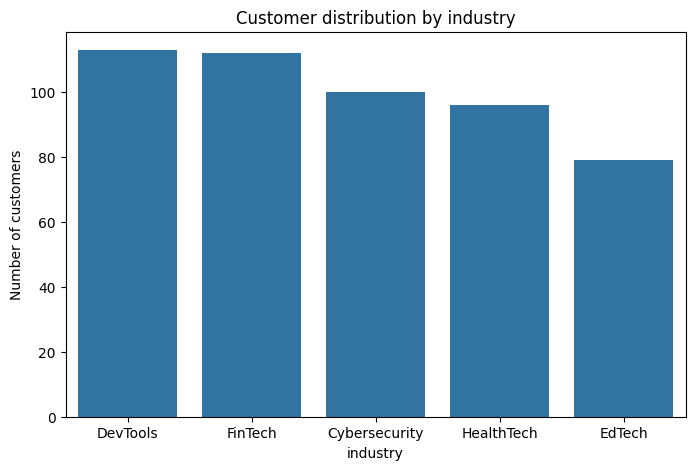

In [1322]:
industry_counts = df_accounts.industry.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=industry_counts.index , y=industry_counts.values)
plt.title("Customer distribution by industry")
plt.ylabel("Number of customers")
plt.show()


#### Customer distribution across countries 

In [1323]:
df_accounts["country"] = df_accounts["country"].replace({
    "IN":"India",
    "US":"USA",
    "AU":"Australia",
    "DE":"Germany \n (Deutschland)",
    "CA":"Canada","FR":"France"
    })

Text(0, 0.5, 'Number of customers')

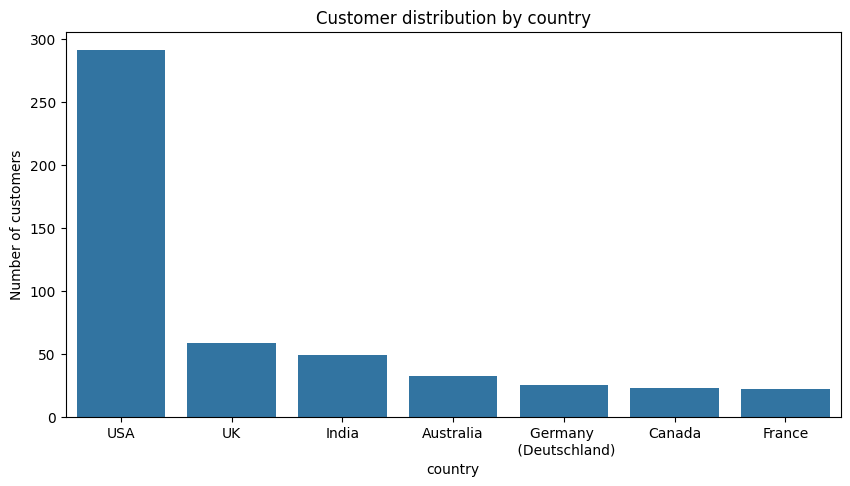

In [1324]:
Country_counts = df_accounts.country.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=Country_counts.index,y=Country_counts.values)
plt.title("Customer distribution by country")
plt.ylabel("Number of customers")

### Current customer count across Plan tiers

Text(0, 0.5, 'Number of customers')

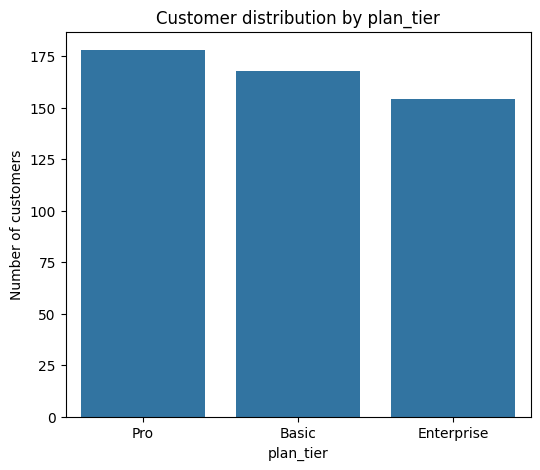

In [1325]:

Plan_counts = df_accounts.plan_tier.value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=Plan_counts.index,y=Plan_counts.values)
plt.title("Customer distribution by plan_tier")
plt.ylabel("Number of customers")

#### Total churns

In [1326]:
df_accounts[df_accounts.churn_flag == True].shape[0]

110

#### Churn percentile - 22%

In [1327]:
df_accounts["churn_flag"].value_counts(normalize=True) * 100

churn_flag
False    78.0
True     22.0
Name: proportion, dtype: float64

#### Churn Reasons

Text(0, 0.5, 'Number of customers')

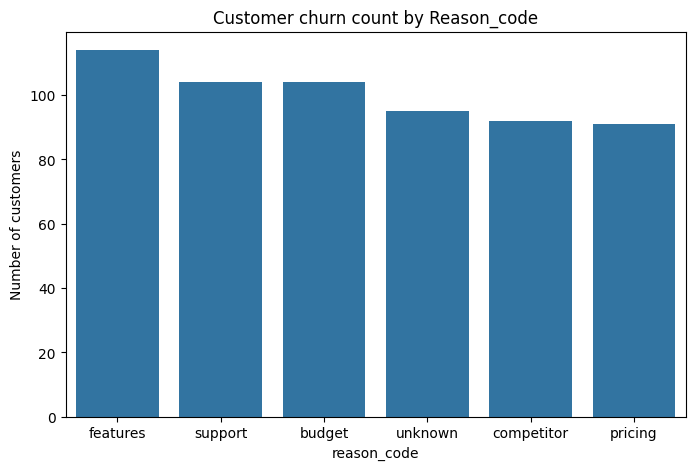

In [1328]:

Reason_counts = df_churn_events["reason_code"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=Reason_counts.index,y=Reason_counts.values)
plt.title("Customer churn count by Reason_code")
plt.ylabel("Number of customers")

#### Churns with refund provided

In [1329]:
df_churn_events[df_churn_events["refund_amount_usd"]>0].shape[0]

142

#### 23% of churns were provided refunds

In [1330]:
(df_churn_events[df_churn_events["refund_amount_usd"]>0].shape[0]/df_churn_events.shape[0])*100

23.666666666666668

#### Customer Churn Feedback

Text(0, 0.5, 'Number of customers')

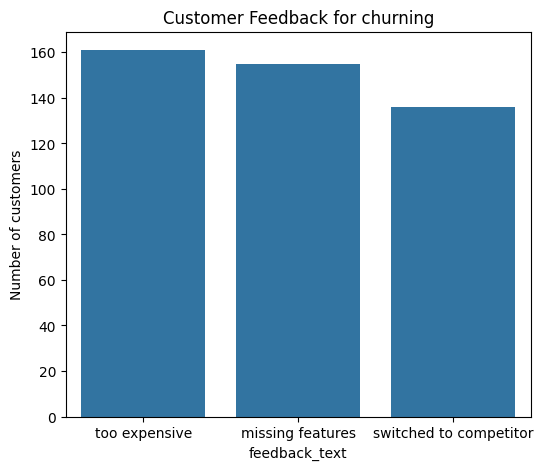

In [1331]:
Feedback_counts = df_churn_events["feedback_text"].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=Feedback_counts.index,y=Feedback_counts.values)
plt.title("Customer Feedback for churning")
plt.ylabel("Number of customers")

#### Most common subscription plan_tiers

Text(0, 0.5, 'Number of customers')

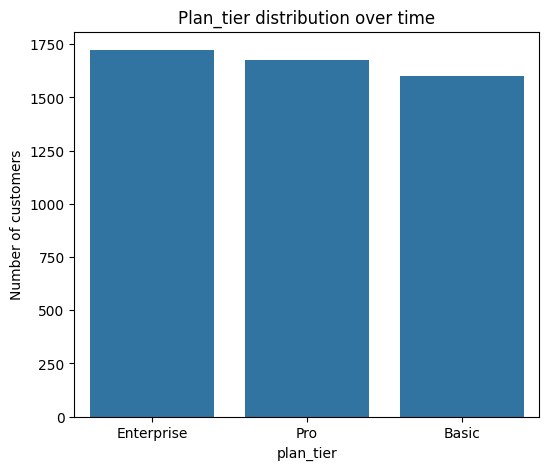

In [1332]:
Subscription_plan_counts = df_subscriptions["plan_tier"].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=Subscription_plan_counts.index,y=Subscription_plan_counts.values)
plt.title("Plan_tier distribution over time")
plt.ylabel("Number of customers")

#### Common billing frequency   (Monthly > Annual)

In [1333]:
df_subscriptions["billing_frequency"].value_counts()

billing_frequency
monthly    2539
annual     2461
Name: count, dtype: int64

#### Total customer support requests

In [1334]:
df_support_tickets.shape[0]

2000

### Total churned trial users - 25

In [1335]:
df_accounts.groupby("is_trial")["churn_flag"].sum()

is_trial
False    85
True     25
Name: churn_flag, dtype: int64

### Customer churn by Plan_tiers (Trial vs Non-trial)

In [1336]:
is_trial_churn_tiers = df_accounts[df_accounts["is_trial"]==True].groupby("plan_tier")["churn_flag"].mean()*100
no_trial_churn_tiers = df_accounts[df_accounts["is_trial"]==False].groupby("plan_tier")["churn_flag"].mean()*100

In [1337]:
df_accounts_tiers_summary =   df_accounts.groupby("plan_tier").agg(
    Total_customers = ("churn_flag","count"),
    Churned_customers = ("churn_flag","sum"),
    Churn_rate_pct = ("churn_flag",lambda x: x.mean()*100)
)


df_accounts_tiers_summary["is_trial_churn_rate_pct"] = is_trial_churn_tiers
df_accounts_tiers_summary["no_trial_churn_rate_pct"] = no_trial_churn_tiers


df_accounts_tiers_summary.sort_values("Churn_rate_pct",ascending=False)

,Total_customers,Churned_customers,Churn_rate_pct,is_trial_churn_rate_pct,no_trial_churn_rate_pct
plan_tier,,,,,
Enterprise,154,34,22.077922,24.000000,21.705426
Basic,168,37,22.023810,24.137931,21.582734
Pro,178,39,21.910112,27.906977,20.000000


##### Across all plan-tiers trial users consistently churn than non-trial users , indicating less commitment and gaps between trial to paid conversions.

### Customer churn by industry (Trial vs Non-trial)

In [1338]:
is_trial_churn_industry = df_accounts[df_accounts["is_trial"]==True].groupby("industry")["churn_flag"].mean()*100
no_trial_churn_industry = df_accounts[df_accounts["is_trial"]==False].groupby("industry")["churn_flag"].mean()*100

In [1339]:
df_accounts_industry_summary = df_accounts.groupby("industry").agg(
    Total_customers = ("churn_flag","count"),
    Churned_customers = ("churn_flag","sum"),
    Churn_rate_pct = ("churn_flag",lambda x: x.mean()*100)
)


df_accounts_industry_summary["is_trial_churn_rate_pct"] = is_trial_churn_industry
df_accounts_industry_summary["no_trial_churn_rate_pct"] = no_trial_churn_industry


df_accounts_industry_summary.sort_values("Churn_rate_pct",ascending=False)

,Total_customers,Churned_customers,Churn_rate_pct,is_trial_churn_rate_pct,no_trial_churn_rate_pct
industry,,,,,
DevTools,113,35,30.973451,26.086957,32.222222
FinTech,112,25,22.321429,31.578947,20.430108
HealthTech,96,21,21.875000,35.294118,18.987342
EdTech,79,13,16.455696,23.529412,14.516129
Cybersecurity,100,16,16.000000,14.285714,16.455696


##### Churn_rate varies among different industries , with Fintech and Healthcare showing significantly higher churn_rate among trial_users , whereas in DevTools trial_users churn less than non trial-users

### Customer churn by country (Trial vs Non-trial)

In [1340]:
is_trial_churn_country = df_accounts[df_accounts["is_trial"]==True].groupby("country")["churn_flag"].mean()*100
no_trial_churn_country= df_accounts[df_accounts["is_trial"]==False].groupby("country")["churn_flag"].mean()*100

In [1341]:
df_accounts_country_summary = df_accounts.groupby("country").agg(
    Total_customers = ("churn_flag","count"),
    Churned_customers = ("churn_flag","sum"),
    Churn_rate_pct = ("churn_flag",lambda x: x.mean()*100),
)


df_accounts_country_summary["is_trial_churn_rate_pct"] = is_trial_churn_country
df_accounts_country_summary["no_trial_churn_rate_pct"] = no_trial_churn_country


df_accounts_country_summary.sort_values("Churn_rate_pct",ascending=False)

,Total_customers,Churned_customers,Churn_rate_pct,is_trial_churn_rate_pct,no_trial_churn_rate_pct
country,,,,,
Germany \n (Deutschland),25,8,32.000000,40.000000,30.000000
USA,291,68,23.367698,26.785714,22.553191
France,22,5,22.727273,0.000000,26.315789
India,49,10,20.408163,20.000000,20.454545
UK,58,11,18.965517,28.571429,15.909091
Canada,23,4,17.391304,28.571429,12.500000
Australia,32,4,12.500000,14.285714,12.000000


##### Customers churn_rate in countries varies significantly, where France shows no churns among trial_users , India with near similar churn_rates for both trial and non-trial users , indicating trial status has little impact here. in contrast countries such as Denmark,USA,UK,Canada,Australia exhibit higher churn_rates among trial_users

#### Refund analysis by churn_reason

In [1342]:

df_refund_summary = df_churn_events.groupby("reason_code").agg(
    Total_churns = ("churn_event_id","count"),
    Total_churns_provided_refund = ("refund_amount_usd",lambda x: (x>0).sum()),
    Average_refund_rate_in_usd = ("refund_amount_usd","mean")
)
df_refund_summary


,Total_churns,Total_churns_provided_refund,Average_refund_rate_in_usd
reason_code,,,
budget,104,24,11.995577
competitor,92,18,13.081848
features,114,24,16.718421
pricing,91,22,14.651099
support,104,28,11.727308
unknown,95,26,18.340947


### Upgraded before churned

In [1343]:
((df_churn_events[df_churn_events["preceding_upgrade_flag"] == True].shape[0])/df_churn_events.shape[0])*100

20.5

##### Approximately 20% of customers upgraded before they churned. indicating upgrading always doesnt resolve dissatisfaction

### Upgraded before churned

In [1344]:
((df_churn_events[df_churn_events["preceding_downgrade_flag"] == True].shape[0])/df_churn_events.shape[0])*100

8.833333333333334

##### Only about 9% of customers downgraded prior to cancellation , representing a final attempt to reduce cost before churning.

### Total beta_features - 2544 (~10%)

In [1345]:
(df_feature_usage[df_feature_usage["is_beta_feature"]].shape[0]/df_feature_usage.shape[0])*100

10.176

In [1346]:
df_feature_usage[df_feature_usage["is_beta_feature"]].shape[0]

2544

### Average usage_duration - ~50 minutes

In [1347]:
df_feature_usage["usage_duration_secs"].mean() / 60

np.float64(50.70338133333333)

### Usage Error_count

In [1348]:
df_feature_usage["error_count"].value_counts()

error_count
0    17269
1     3759
2     2312
3     1096
4      419
5      113
6       30
7        1
8        1
Name: count, dtype: int64

##### only included errors above than 3 as they contain high-risk. as lower values were common and did not indicate churn risk.

In [1349]:
Feature_error_faced = df_feature_usage[df_feature_usage["error_count"].isin([3,4,5,6])]

In [1350]:
##aggregate
error_agg = Feature_error_faced.groupby("subscription_id").agg(
    total_error_events=("error_count", "count"),
    total_errors=("error_count", "sum")
).reset_index()


##merge
df_error_subs = (
    error_agg
    .merge(df_subscriptions[["subscription_id","account_id"]], on="subscription_id")
)

##merge relative to unique account_id
df_error_accounts = df_error_subs.groupby("account_id").agg(
    total_error_events=("total_error_events", "count"),
    total_errors=("total_errors", "sum")
).reset_index()

##flag
df_error_subs["churned"] = df_error_subs["account_id"].isin(df_churn_events["account_id"])
df_error_subs.shape[0]


1424

In [1351]:
df_error_accounts.shape[0]

477

In [1352]:
df_error_subs_summary = pd.DataFrame({
    "count": df_error_subs["churned"].value_counts(),
    "rate_pct": df_error_subs["churned"].value_counts(normalize=True)*100
})
df_error_subs_summary

,count,rate_pct
churned,,
True,1012,71.067416
False,412,28.932584


##### Approximately 71% of subscriptions with three or more errors have churned , indicating unresolved problem issues.

##### 

### Subscriptions upgraded by plan_tier

In [1353]:
df_subscriptions_upgrade_summary = df_subscriptions.groupby("plan_tier").agg(
    upgrade_count = ("upgrade_flag","sum"),
    upgrade_rate_pct = ("upgrade_flag",lambda x: x.mean()*100)
    )

df_subscriptions_upgrade_summary



,upgrade_count,upgrade_rate_pct
plan_tier,,
Basic,141,8.801498
Enterprise,194,11.259431
Pro,194,11.582090


### Subscriptions downgraded by plan_tier

In [1354]:
df_subscriptions_upgrade_summary = df_subscriptions.groupby("plan_tier").agg(
    downgrade_count = ("downgrade_flag","sum"),
    downgrade_rate_pct = ("downgrade_flag",lambda x: x.mean()*100)
    )

df_subscriptions_upgrade_summary



,downgrade_count,downgrade_rate_pct
plan_tier,,
Basic,60,3.745318
Enterprise,68,3.946605
Pro,90,5.373134


### Initial subscription plan

In [1355]:
no_change = df_subscriptions[(df_subscriptions["upgrade_flag"] == False) & (df_subscriptions["downgrade_flag"]==False)]

In [1356]:
no_change.groupby("plan_tier").size()

plan_tier
Basic         1406
Enterprise    1468
Pro           1402
dtype: int64

##### There is no dominant plan_tier, as subscriptions are evenly distributed across all plan_tiers.

### Billing frequency 

In [1357]:
df_subscriptions_billing_summary = pd.DataFrame({
    "billing_frequency_count": df_subscriptions["billing_frequency"].value_counts(),
    "billing_frequency_rate" : df_subscriptions["billing_frequency"].value_counts(normalize=True)*100
})
df_subscriptions_billing_summary

,billing_frequency_count,billing_frequency_rate
billing_frequency,,
monthly,2539,50.78
annual,2461,49.22


### Subscriptions with zero revenue correspond to trials


In [1358]:
df_subscriptions[df_subscriptions["mrr_amount"] == 0]["is_trial"].value_counts()

is_trial
True    778
Name: count, dtype: int64

### Revenue By year

In [1359]:
df_subscriptions["start_date"] = pd.to_datetime(df_subscriptions["start_date"])
df_subscriptions["end_date"] = pd.to_datetime(df_subscriptions["end_date"] , errors = "coerce")
df_subscriptions.groupby(df_subscriptions["start_date"].dt.year)["arr_amount"].sum()


start_date
2023     15763296
2024    120301668
Name: arr_amount, dtype: int64

### Subscriptions by plan_tier (Year-wise)

In [1360]:
df_subscriptions.groupby(df_subscriptions["start_date"].dt.year)["plan_tier"].value_counts().unstack()

plan_tier,Basic,Enterprise,Pro
start_date,,,
2023,241,209,216
2024,1361,1514,1459


### Plan_tiers by year

In [1361]:
df_subscriptions.groupby(df_subscriptions["start_date"].dt.year)["plan_tier"].value_counts()

start_date  plan_tier 
2023        Basic          241
            Pro            216
            Enterprise     209
2024        Enterprise    1514
            Pro           1459
            Basic         1361
Name: count, dtype: int64

##### In 2023 , subscriptions are uniformly distributed across all plant_tiers.
##### In 2024 , the overall subscriptions has increased significantly, with Enterprise leading the plan_tiers meaning higher-value customers have increased.

In [1362]:
df_support_tickets.groupby("priority")["first_response_time_minutes"].mean()

priority
high      91.439216
low       91.152577
medium    85.855397
urgent    85.529183
Name: first_response_time_minutes, dtype: float64

### Average resolutiuon time by priority

In [1363]:
df_support_tickets.groupby("priority")["resolution_time_hours"].mean()

priority
high      36.958824
low       36.346392
medium    35.594705
urgent    34.568093
Name: resolution_time_hours, dtype: float64

### Priority_count

In [1364]:
df_support_tickets["priority"].value_counts()

priority
urgent    514
high      510
medium    491
low       485
Name: count, dtype: int64

##### urgent tickets have faster first response time and are also resolved slightly faster than other priorities. However average resolution time is still high for all priorities(~35 , ~36).  indicating limited support capacity.

### Support_tickets satisfaction score breakdown

In [1365]:
df_support_tickets["satisfaction_score"].value_counts(dropna=False)

satisfaction_score
NaN    825
4.0    405
3.0    396
5.0    374
Name: count, dtype: int64

##### Customer feedback coverage is low , but available satisfaction ratings are generally positive (3-5)

### Aggregate

In [1370]:
df_ticket_agg = df_support_tickets.groupby("account_id").agg(
    total_tickets = ("ticket_id","count")
).reset_index()
df_ticket_agg.sample(1)

,account_id,total_tickets
39,A-118d55,5


In [1371]:
df_subs_agg = df_subscriptions.groupby("account_id").agg(
    mrr_amount = ("mrr_amount","max"),
    seats = ("seats","max"),
    is_trial = ("is_trial","max")
).reset_index()
df_subs_agg.sample(1)

,account_id,mrr_amount,seats,is_trial
310,A-9c18c4,3781,19,True


In [1372]:
df_error_accounts.sample(1)

,account_id,total_error_events,total_errors
416,A-e1462e,2,6


In [1373]:
df_resolution_satisfaction_agg = df_support_tickets.groupby("account_id").agg(
    average_resolution_time = ("resolution_time_hours","mean"),
    average_satisfaction_score = ("satisfaction_score","mean")
).round(2).reset_index()
df_resolution_satisfaction_agg.sample(1)

,account_id,average_resolution_time,average_satisfaction_score
89,A-310452,34.2,3.6


In [1374]:

df_churn_drivers = (
    df_accounts[["account_id","churn_flag"]]
    )
df_churn_drivers = df_churn_drivers.merge(
    df_subs_agg , how = "left",on="account_id"
).merge(
    df_ticket_agg, how="left",on="account_id"
).merge(
    df_error_accounts,how="left",on="account_id"
).merge(
    df_resolution_satisfaction_agg,how="left",on="account_id"
)

df_churn_drivers

,account_id,churn_flag,mrr_amount,seats,is_trial,total_tickets,total_error_events,total_errors,average_resolution_time,average_satisfaction_score
0,A-2e4581,False,5771,102,True,2.0,5.0,23.0,23.00,3.00
1,A-43a9e3,True,5572,28,False,3.0,3.0,9.0,38.00,4.00
2,A-0a282f,False,5771,60,True,3.0,5.0,18.0,43.67,4.67
3,A-1f0ac7,False,4776,47,True,2.0,1.0,3.0,29.00,NaN
4,A-ce550d,True,21691,109,True,7.0,4.0,12.0,42.29,3.80
...,...,...,...,...,...,...,...,...,...,...
495,A-8ae3fc,False,1666,88,True,4.0,4.0,18.0,39.50,3.50
496,A-55f257,False,4577,38,True,6.0,2.0,7.0,43.17,5.00
497,A-d26ab4,True,6567,62,True,2.0,3.0,9.0,49.50,4.00
498,A-712533,False,3582,70,True,5.0,5.0,18.0,37.40,3.75


### Correlation heat map

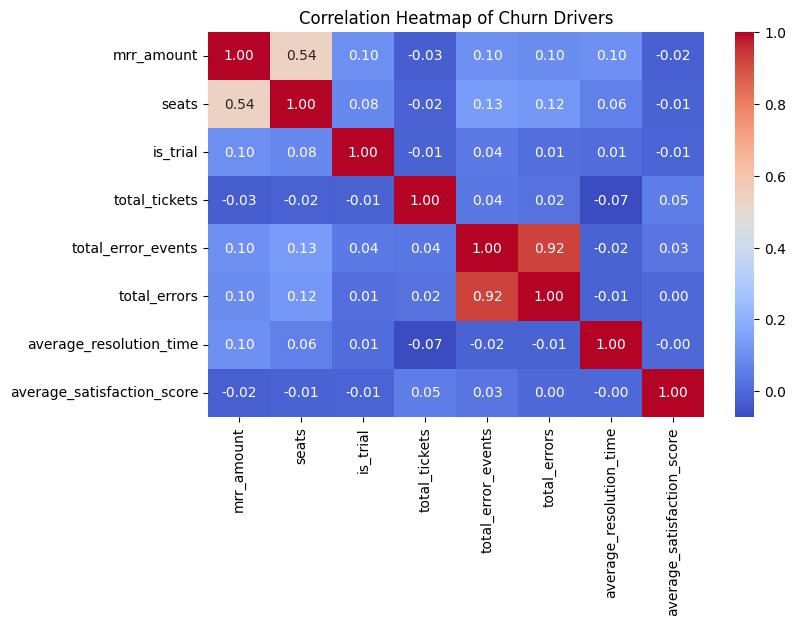

In [1375]:

num_cols = df_churn_drivers[df_churn_drivers.columns.drop(["account_id","churn_flag"])]

corr = num_cols.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap of Churn Drivers")
plt.show()


In [1376]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [1377]:
x = df_churn_drivers[["mrr_amount","seats","is_trial","total_errors","total_tickets","average_resolution_time"]]
x = x.fillna(0)
y = df_churn_drivers["churn_flag"].astype(int)

In [1378]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [1379]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled,y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [1380]:
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:,1]

In [1382]:
print(confusion_matrix(y_test, y_pred))




[[83  0]
 [17  0]]


In [1384]:
print("ROC AUC:", roc_auc_score(y_test, y_prob))

ROC AUC: 0.4613749114103473


In [1383]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        83
           1       0.00      0.00      0.00        17

    accuracy                           0.83       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.69      0.83      0.75       100



c:\Users\sydeen\Downloads\data analyst projects\python\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sydeen\Downloads\data analyst projects\python\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sydeen\Downloads\data analyst projects\python\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

## Overall Insights

##### Ravenstack is experiencing churn mainly due to customer experience , trial users churn consistently , indicating weaker trial-paid gap conversions,churn rates also vary across countries, suggesting localized improvement than one global solution.customers who experience higher errors also churn at a higher rate,proving platform stability directly impacts recurring revenue. Additionally, churn reasons and feedback indicate that pricing , missing features, and support quality are the most common drivers behind cancellations.Finally the business grew stronger in 2024 with more high-tier subscriptions but with a loss of enterprise-tier customers leading to revenue leakage raising concers for retention, and strengthening support response time should be priorotized.

### Recommnedations

#### . improve trial experience by including better features to assure trial_users experience. 
#### . use localized retention strategies , targeting country_level customers based on affordability , user behaviour and market needs.
#### . providing better customer experience should be a top priority as customers commonly experience missing features and poor support quality 
#### . Strengthen customer support , by providing resolutions faster.
#### . Focusing retention efforts on plan_tiers (especially Enterprise).